# MNIST

## Data

In [1]:
import theano
import theano.tensor as T
import numpy as np
from sklearn.datasets import fetch_mldata
from theano.sandbox import cuda

# Download Data
mnist = fetch_mldata("MNIST original", data_home="data")

data_input    = np.asarray(mnist.data, dtype=theano.config.floatX)
data_target   = mnist.target
classes_names = np.array(range(10))

Using gpu device 0: GeForce GT 630M (CNMeM is enabled with initial size: 75.0% of memory, cuDNN not available)


## Training

In [2]:
from deepensemble.models.sequential import Sequential
from deepensemble.layers.dense import Dense
from deepensemble.utils.cost_functions import *
from deepensemble.utils.update_functions import *
from deepensemble.utils.regularizer_functions import *
from sklearn import cross_validation

net1 = Sequential("mlp", "classifier", classes_names)
net1.add_layer(Dense(n_input=data_input.shape[1], n_output=len(classes_names), activation=T.nnet.softmax))
net1.append_cost(neg_log_likelihood)
net1.set_update(sgd)
net1.compile()

max_epoch = 300

input_train, input_test, target_train, target_test = cross_validation.train_test_split(
        data_input, data_target, test_size=0.3, random_state=0)

metrics = net1.fit(input_train, target_train,
                                max_epoch=max_epoch, batch_size=32, early_stop=False)
# Compute metrics
metrics.append_prediction(target_test, net1.predict(input_test))

Start Compile mlp  - elapsed: 0.87 [s]
mlp - epoch:[####################] 300/300 elapsed: 120.35[s] - left: 0.00[s] 


## Results

             precision    recall  f1-score   support

          0       0.96      0.91      0.94      2008
          1       0.93      0.96      0.94      2412
          2       0.65      0.95      0.77      2045
          3       0.88      0.83      0.85      2082
          4       0.88      0.92      0.90      2078
          5       0.79      0.83      0.81      1920
          6       0.96      0.83      0.89      2078
          7       0.93      0.89      0.91      2191
          8       0.86      0.71      0.78      2093
          9       0.92      0.82      0.87      2093

avg / total       0.88      0.87      0.87     21000



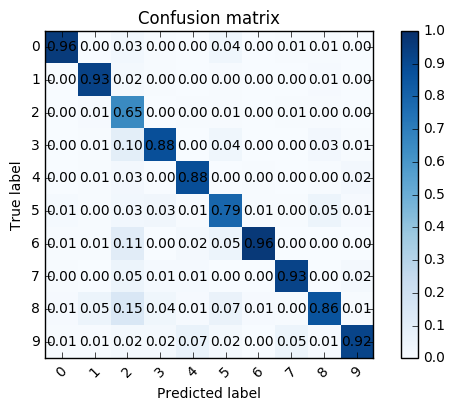

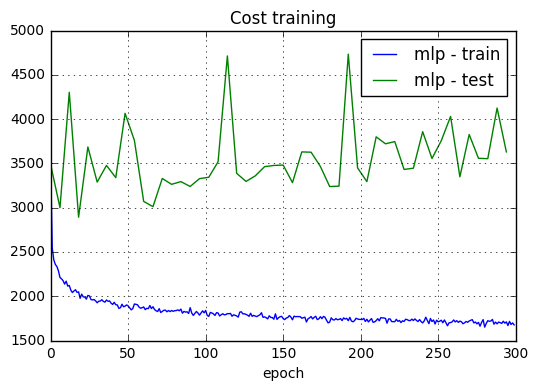

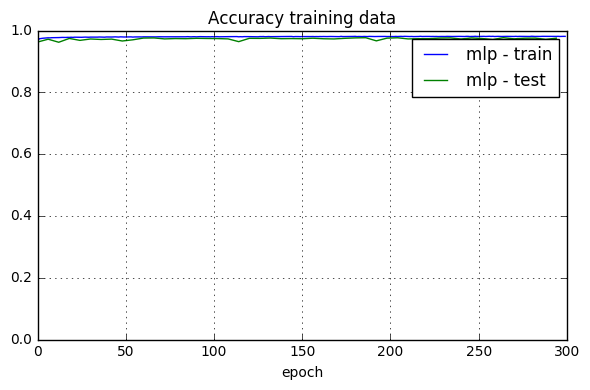

In [3]:
%matplotlib inline
import matplotlib.pylab as plt

metrics.classification_report()
metrics.plot_confusion_matrix()
metrics.plot_cost(max_epoch, "Cost training")
metrics.plot_score(max_epoch, "Accuracy training data")

plt.tight_layout()